In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
import os

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df

Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
11954  20631  1.504204 -0.411728  0.200090 -0.778753 -0.442232 -0.119677   
11955  20636  1.134994  0.096340  0.277921  0.319692  0.742800  1.611803   
11956  20638 -6.305012  3.944886 -4.707362  1.539602 -3.934785 -1.730565   
11957  20638  1.161960 -0.398297  1.123732 -0.474237 -1.226667 -0.519325   
11958  20642  1.291096 -0.226628  0.708386 -0.719236 -0.659099 -0.273757   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1     -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2      0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3      0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4      0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...         ...       ...       ...  ...       ...       ...       ...   
11954 -0.782660 -0.165178  0.691819  ... -0.136231 -0.217274 -0.143260   
11955 -0.458649  0.390012  1.424541  ... -0.395605 -0.743542  0.222256   
11956 -2.104936  3.843447  0.863458  ...  0.073140 -0.039935 -0.108896   
11957 -0.804179  0.070134  3.262926  ... -0.121191  0.097255  0.050903   
11958 -0.612042 -0.111488  3.032258  ...       NaN       NaN       NaN   

            V24       V25       V26       V27       V28  Amount  Class  
0      0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62    0.0  
1     -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69    0.0  
2     -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66    0.0  
3     -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50    0.0  
4      0.141267 -0.206010  0.502292  0.219422  0.215153   69.99    0.0  
...         ...       ...       ...       ...       ...     ...    ...  
11954 -1.057332  0.529188 -0.235062 -0.012089  0.000905    9.00    0.0  
11955 -1.859104 -0.109777  0.279049  0.012398 -0.009090    0.99    0.0  
11956  0.691434 -0.261979 -0.447540  0.212900 -0.031021   89.99    0.0  
11957  0.330479  0.315692 -0.712765  0.073836  0.028055   11.85    0.0  
11958       NaN       NaN       NaN       NaN       NaN     NaN    NaN  

[11959 rows x 31 columns]

In [6]:
df.shape

(11959, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

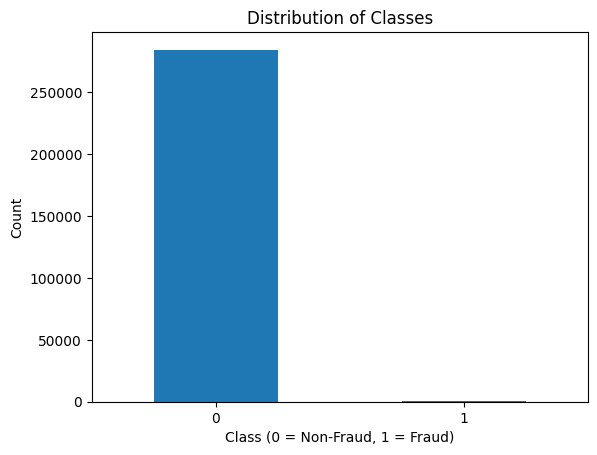

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Class'].value_counts().plot(kind='bar')
plt.title("Distribution of Classes")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

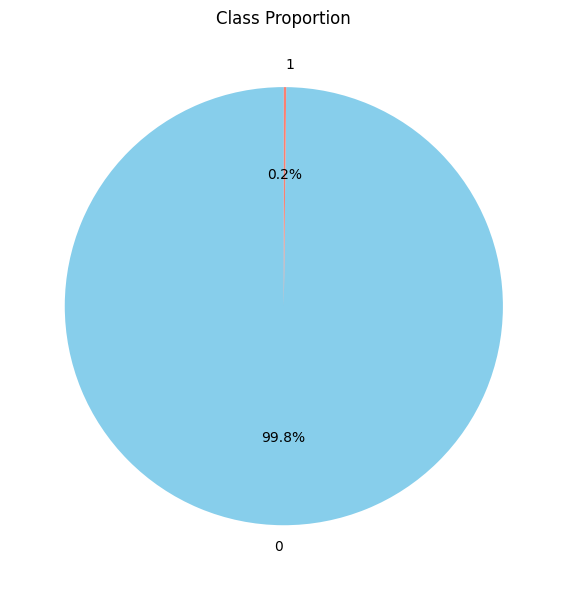

In [ ]:
plt.figure(figsize=(6,6))
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Class Proportion')
plt.ylabel('')
plt.tight_layout()
plt.show()

<ipython-input-31-2c03e45911c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cor_target.values, y=cor_target.index, palette='mako')


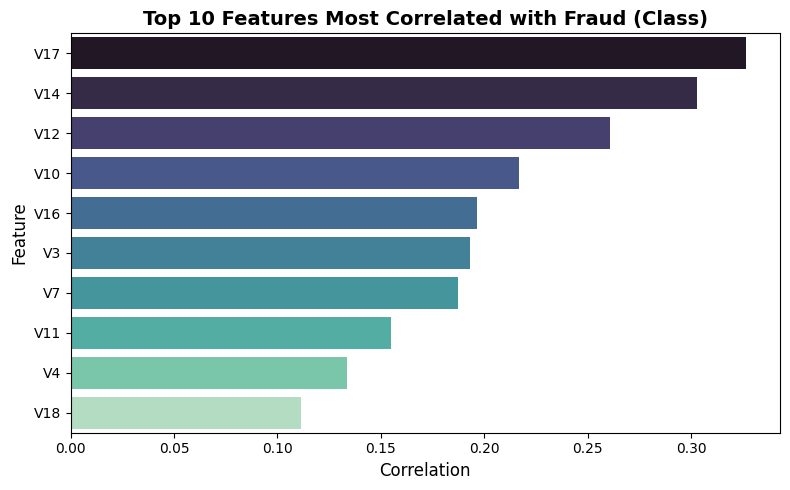

In [ ]:
corr = df.corr(numeric_only=True)
cor_target = abs(corr['Class']).sort_values(ascending=False)[1:11]
plt.figure(figsize=(8, 5))
sns.barplot(x=cor_target.values, y=cor_target.index, palette='mako')
plt.title('Top 10 Features Most Correlated with Fraud (Class)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# افترضي أن df هو DataFrame الكامل
minority_df = df[df['Class'] == 1]  # بيانات الاحتيال فقط
X_minority = minority_df.drop(columns=['Class']).values

# تطبيع البيانات إلى [0, 1]
scaler = MinMaxScaler()
X_minority = scaler.fit_transform(X_minority)


In [ ]:
X_tensor = torch.tensor(X_minority, dtype=torch.float32)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# تحقق من GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# بيانات الفئة النادرة فقط (بعد التطبيع)
# X_minority: numpy array (عدد العينات × عدد الميزات)
X_tensor = torch.tensor(X_minority, dtype=torch.float32)
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

input_dim = X_tensor.shape[1]
latent_dim = 100


In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
        )

    def forward(self, z):
        return self.model(z)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)


In [ ]:

G = Generator(latent_dim, input_dim).to(device)
D = Discriminator(input_dim).to(device)

# محسنات وخسارة
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)

epochs = 200

for epoch in range(epochs):
    for real_batch, in dataloader:
        real_batch = real_batch.to(device)
        batch_size = real_batch.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        ### Train Discriminator ###
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z)

        D_real = D(real_batch)
        D_fake = D(fake_data.detach())

        D_loss = criterion(D_real, real_labels) + criterion(D_fake, fake_labels)

        optimizer_D.zero_grad()
        D_loss.backward()
        optimizer_D.step()

        ### Train Generator ###
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z)
        D_fake = D(fake_data)

        G_loss = criterion(D_fake, real_labels)  # نحاول خداع المميز

        optimizer_G.zero_grad()
        G_loss.backward()
        optimizer_G.step()

    # طباعة كل 10 دورات
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {D_loss.item():.4f} | G Loss: {G_loss.item():.4f}")


Epoch [10/200] | D Loss: 1.3304 | G Loss: 0.5491
Epoch [20/200] | D Loss: 1.3837 | G Loss: 0.7143
Epoch [30/200] | D Loss: 1.4172 | G Loss: 0.7120
Epoch [40/200] | D Loss: 1.3569 | G Loss: 0.7794
Epoch [50/200] | D Loss: 1.3581 | G Loss: 0.7498
Epoch [60/200] | D Loss: 1.3220 | G Loss: 0.8187
Epoch [70/200] | D Loss: 1.3954 | G Loss: 0.6813
Epoch [80/200] | D Loss: 1.3474 | G Loss: 0.7262
Epoch [90/200] | D Loss: 1.3464 | G Loss: 0.7111
Epoch [100/200] | D Loss: 1.3551 | G Loss: 0.6652
Epoch [110/200] | D Loss: 1.3846 | G Loss: 0.6865
Epoch [120/200] | D Loss: 1.4074 | G Loss: 0.7036
Epoch [130/200] | D Loss: 1.3246 | G Loss: 0.7642
Epoch [140/200] | D Loss: 1.3820 | G Loss: 0.6727
Epoch [150/200] | D Loss: 1.3849 | G Loss: 0.7068
Epoch [160/200] | D Loss: 1.3592 | G Loss: 0.6933
Epoch [170/200] | D Loss: 1.4194 | G Loss: 0.6724
Epoch [180/200] | D Loss: 1.3871 | G Loss: 0.7054
Epoch [190/200] | D Loss: 1.3767 | G Loss: 0.6842
Epoch [200/200] | D Loss: 1.3786 | G Loss: 0.6639


In [ ]:
# توليد 1000 عينة جديدة من الفئة النادرة
G.eval()
with torch.no_grad():
    z = torch.randn(1000, latent_dim).to(device)
    generated_data = G(z).cpu().numpy()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


latent_dim = 100
input_dim = X_minority.shape[1]
num_classes = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# دالة لتحويل التصنيفات إلى one-hot
def one_hot(labels, num_classes):
    return torch.eye(num_classes)[labels.long()]

# تعريف المولد الشرطي (Conditional Generator)
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, input_dim, num_classes):
        super(ConditionalGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
        )

    def forward(self, z, labels):
        x = torch.cat([z, labels], dim=1)
        return self.model(x)

# تعريف المميز الشرطي (Conditional Discriminator)
class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ConditionalDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + num_classes, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x, labels):
        x = torch.cat([x, labels], dim=1)
        return self.model(x)

# تحضير بيانات الفئة النادرة
X_tensor = torch.tensor(X_minority, dtype=torch.float32)
y_tensor = torch.tensor([1] * len(X_minority))

dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# تهيئة النماذج
G = ConditionalGenerator(latent_dim, input_dim, num_classes).to(device)
D = ConditionalDiscriminator(input_dim, num_classes).to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)

# التدريب
epochs = 200
for epoch in range(epochs):
    for real_data, labels in dataloader:
        real_data = real_data.to(device)
        labels = one_hot(labels, num_classes).to(device)  # تحويل إلى one-hot

        batch_size = real_data.size(0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)


        z = torch.randn(batch_size, latent_dim).to(device)
        gen_data = G(z, labels)

        D_real = D(real_data, labels)
        D_fake = D(gen_data.detach(), labels)

        D_loss = criterion(D_real, real_labels) + criterion(D_fake, fake_labels)

        optimizer_D.zero_grad()
        D_loss.backward()
        optimizer_D.step()


        z = torch.randn(batch_size, latent_dim).to(device)
        gen_data = G(z, labels)
        D_fake = D(gen_data, labels)

        G_loss = criterion(D_fake, real_labels)

        optimizer_G.zero_grad()
        G_loss.backward()
        optimizer_G.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {D_loss.item():.4f} | G Loss: {G_loss.item():.4f}")

# توليد بيانات جديدة بعد التدريب
G.eval()
with torch.no_grad():
    z = torch.randn(1000, latent_dim).to(device)
    labels = torch.tensor([1] * 1000)  # توليد بيانات للفئة 1
    labels = one_hot(labels, num_classes).to(device)
    synthetic_samples = G(z, labels).cpu().numpy()


Epoch [10/200] | D Loss: 1.2644 | G Loss: 0.5461
Epoch [20/200] | D Loss: 1.4627 | G Loss: 0.6902
Epoch [30/200] | D Loss: 1.3634 | G Loss: 0.8091
Epoch [40/200] | D Loss: 1.2960 | G Loss: 0.8918
Epoch [50/200] | D Loss: 1.3531 | G Loss: 0.7650
Epoch [60/200] | D Loss: 1.3743 | G Loss: 0.7195
Epoch [70/200] | D Loss: 1.3307 | G Loss: 0.6815
Epoch [80/200] | D Loss: 1.2884 | G Loss: 0.7525
Epoch [90/200] | D Loss: 1.3620 | G Loss: 0.6788
Epoch [100/200] | D Loss: 1.3790 | G Loss: 0.7072
Epoch [110/200] | D Loss: 1.3588 | G Loss: 0.6795
Epoch [120/200] | D Loss: 1.3516 | G Loss: 0.6999
Epoch [130/200] | D Loss: 1.3828 | G Loss: 0.7560
Epoch [140/200] | D Loss: 1.4182 | G Loss: 0.6741
Epoch [150/200] | D Loss: 1.3470 | G Loss: 0.7449
Epoch [160/200] | D Loss: 1.3899 | G Loss: 0.6745
Epoch [170/200] | D Loss: 1.3699 | G Loss: 0.6461
Epoch [180/200] | D Loss: 1.3926 | G Loss: 0.7142
Epoch [190/200] | D Loss: 1.3860 | G Loss: 0.7379
Epoch [200/200] | D Loss: 1.3717 | G Loss: 0.7097


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader



X = df.drop('Class', axis=1).values
y = df['Class'].values

# 3. تقسيم البيانات مع الحفاظ على توازن الفئات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. دمج بيانات التدريب الأصلية مع البيانات المولدة
X_train_balanced = np.vstack((X_train, synthetic_samples))
y_train_balanced = np.hstack((y_train, synthetic_labels))

# 6. تحويل إلى Tensors وتحضير DataLoader
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64)

# train_loader و test_loader  لتدريب نموذج التصنيف


In [ ]:
import torch.nn as nn
import torch.optim as optim

class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MLPClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.network(x)

def train_model(model, train_loader, epochs=20, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss/len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    from sklearn.metrics import classification_report, confusion_matrix
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(y_batch.numpy())
    print(classification_report(all_labels, all_preds, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))


In [ ]:
# تقسيم البيانات مع stratify
X = df.drop('Class', axis=1).values
y = df['Class'].values

from sklearn.model_selection import train_test_split

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:

X_train_vanilla = np.vstack((X_train_orig, generated_data))
y_train_vanilla = np.hstack((y_train_orig, np.ones(len(generated_data))))


In [ ]:
# synthetic_samples هو ناتج Conditional GAN
X_train_cond = np.vstack((X_train_orig, synthetic_samples))
y_train_cond = np.hstack((y_train_orig, np.ones(len(synthetic_samples))))


In [ ]:
def create_loaders(X_train, y_train, X_test, y_test, batch_size=64):
    train_loader = DataLoader(
        TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                      torch.tensor(y_train, dtype=torch.long)),
        batch_size=batch_size,
        shuffle=True
    )
    test_loader = DataLoader(
        TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                      torch.tensor(y_test, dtype=torch.long)),
        batch_size=batch_size
    )
    return train_loader, test_loader


In [ ]:
input_dim = X_train_orig.shape[1]
model_orig = MLPClassifier(input_dim)
train_loader_orig, test_loader_orig = create_loaders(X_train_orig, y_train_orig, X_test_orig, y_test_orig)
train_model(model_orig, train_loader_orig)
print("Evaluation on Original Imbalanced Data")
evaluate_model(model_orig, test_loader_orig)

model_vanilla = MLPClassifier(input_dim)
train_loader_vanilla, test_loader_vanilla = create_loaders(X_train_vanilla, y_train_vanilla, X_test_orig, y_test_orig)
train_model(model_vanilla, train_loader_vanilla)
print("Evaluation on Vanilla GAN Balanced Data")
evaluate_model(model_vanilla, test_loader_vanilla)

model_cond = MLPClassifier(input_dim)
train_loader_cond, test_loader_cond = create_loaders(X_train_cond, y_train_cond, X_test_orig, y_test_orig)
train_model(model_cond, train_loader_cond)
print("Evaluation on Conditional GAN Balanced Data")
evaluate_model(model_cond, test_loader_cond)


Epoch 1/20 - Loss: 1.4608
Epoch 2/20 - Loss: 0.0187
Epoch 3/20 - Loss: 0.0184
Epoch 4/20 - Loss: 0.0142
Epoch 5/20 - Loss: 0.0344
Epoch 6/20 - Loss: 0.0228
Epoch 7/20 - Loss: 0.0800
Epoch 8/20 - Loss: 0.0460
Epoch 9/20 - Loss: 0.0593
Epoch 10/20 - Loss: 0.0610
Epoch 11/20 - Loss: 0.0350
Epoch 12/20 - Loss: 0.0185
Epoch 13/20 - Loss: 0.0510
Epoch 14/20 - Loss: 0.0323
Epoch 15/20 - Loss: 0.0537
Epoch 16/20 - Loss: 0.0531
Epoch 17/20 - Loss: 0.0559
Epoch 18/20 - Loss: 0.0292
Epoch 19/20 - Loss: 0.0383
Epoch 20/20 - Loss: 0.0520
Evaluation on Original Imbalanced Data


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20 - Loss: 3.7886
Epoch 2/20 - Loss: 0.0314
Epoch 3/20 - Loss: 0.0187
Epoch 4/20 - Loss: 0.0254
Epoch 5/20 - Loss: 0.0164
Epoch 6/20 - Loss: 0.0167
Epoch 7/20 - Loss: 0.0228
Epoch 8/20 - Loss: 0.0253
Epoch 9/20 - Loss: 0.0297
Epoch 10/20 - Loss: 0.0933
Epoch 11/20 - Loss: 0.0335
Epoch 12/20 - Loss: 0.0326
Epoch 13/20 - Loss: 0.0156
Epoch 14/20 - Loss: 0.0151
Epoch 15/20 - Loss: 0.0252
Epoch 16/20 - Loss: 0.0531
Epoch 17/20 - Loss: 0.0723
Epoch 18/20 - Loss: 0.0411
Epoch 19/20 - Loss: 0.0268
Epoch 20/20 - Loss: 0.0413
Evaluation on Vanilla GAN Balanced Data


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20 - Loss: 1.8863
Epoch 2/20 - Loss: 0.0332
Epoch 3/20 - Loss: 0.0147
Epoch 4/20 - Loss: 0.0273
Epoch 5/20 - Loss: 0.0185
Epoch 6/20 - Loss: 0.0149
Epoch 7/20 - Loss: 0.0340
Epoch 8/20 - Loss: 0.0231
Epoch 9/20 - Loss: 0.0472
Epoch 10/20 - Loss: 0.0441
Epoch 11/20 - Loss: 0.0376
Epoch 12/20 - Loss: 0.1021
Epoch 13/20 - Loss: 0.0458
Epoch 14/20 - Loss: 0.0482
Epoch 15/20 - Loss: 0.0228
Epoch 16/20 - Loss: 0.0683
Epoch 17/20 - Loss: 0.0211
Epoch 18/20 - Loss: 0.0307
Epoch 19/20 - Loss: 0.0219
Epoch 20/20 - Loss: 0.0332
Evaluation on Conditional GAN Balanced Data


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Accuracy': 0.9982795547909132,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1-Score': 0.0,
 'AUC-ROC': np.float64(0.4917947799547506),
 'Confusion Matrix': array([[56864,     0],
        [   98,     0]]),
 'Probs': [np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.float32(0.0017360233),
  np.fl

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, test_loader):
    from sklearn.metrics import confusion_matrix
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()
    all_preds = []
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_probs.extend(probs)
            all_preds.extend(preds)
            all_labels.extend(y_batch.numpy())

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds)
    rec = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    auc = roc_auc_score(all_labels, all_probs)
    cm = confusion_matrix(all_labels, all_preds)

    return {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC-ROC': auc,
        'Confusion Matrix': cm,
        'Probs': all_probs,
        'Labels': all_labels
    }


In [ ]:
results = {}

# Original
model_orig = MLPClassifier(input_dim)
train_model(model_orig, train_loader_orig)
results['Original'] = evaluate_model(model_orig, test_loader_orig)

# Vanilla GAN
model_vanilla = MLPClassifier(input_dim)
train_model(model_vanilla, train_loader_vanilla)
results['Vanilla GAN'] = evaluate_model(model_vanilla, test_loader_vanilla)

# Conditional GAN
model_cond = MLPClassifier(input_dim)
train_model(model_cond, train_loader_cond)
results['Conditional GAN'] = evaluate_model(model_cond, test_loader_cond)


Epoch 1/20 - Loss: 3.0793
Epoch 2/20 - Loss: 0.0308
Epoch 3/20 - Loss: 0.0142
Epoch 4/20 - Loss: 0.0209
Epoch 5/20 - Loss: 0.0220
Epoch 6/20 - Loss: 0.0248
Epoch 7/20 - Loss: 0.0220
Epoch 8/20 - Loss: 0.0708
Epoch 9/20 - Loss: 0.0616
Epoch 10/20 - Loss: 0.0254
Epoch 11/20 - Loss: 0.0363
Epoch 12/20 - Loss: 0.0456
Epoch 13/20 - Loss: 0.0273
Epoch 14/20 - Loss: 0.0951
Epoch 15/20 - Loss: 0.0279
Epoch 16/20 - Loss: 0.0177
Epoch 17/20 - Loss: 0.0700
Epoch 18/20 - Loss: 0.0777
Epoch 19/20 - Loss: 0.0394
Epoch 20/20 - Loss: 0.0242


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20 - Loss: 1.1356
Epoch 2/20 - Loss: 0.0179
Epoch 3/20 - Loss: 0.0153
Epoch 4/20 - Loss: 0.0275
Epoch 5/20 - Loss: 0.0182
Epoch 6/20 - Loss: 0.0265
Epoch 7/20 - Loss: 0.0360
Epoch 8/20 - Loss: 0.0659
Epoch 9/20 - Loss: 0.0269
Epoch 10/20 - Loss: 0.0184
Epoch 11/20 - Loss: 0.0158
Epoch 12/20 - Loss: 0.0401
Epoch 13/20 - Loss: 0.0334
Epoch 14/20 - Loss: 0.0387
Epoch 15/20 - Loss: 0.0253
Epoch 16/20 - Loss: 0.0332
Epoch 17/20 - Loss: 0.1130
Epoch 18/20 - Loss: 0.1756
Epoch 19/20 - Loss: 0.0630
Epoch 20/20 - Loss: 0.0167


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20 - Loss: 1.4757
Epoch 2/20 - Loss: 0.0222
Epoch 3/20 - Loss: 0.0158
Epoch 4/20 - Loss: 0.0219
Epoch 5/20 - Loss: 0.0149
Epoch 6/20 - Loss: 0.0132
Epoch 7/20 - Loss: 0.0130
Epoch 8/20 - Loss: 0.0916
Epoch 9/20 - Loss: 0.0617
Epoch 10/20 - Loss: 0.0706
Epoch 11/20 - Loss: 0.0461
Epoch 12/20 - Loss: 0.0277
Epoch 13/20 - Loss: 0.0602
Epoch 14/20 - Loss: 0.1073
Epoch 15/20 - Loss: 0.0325
Epoch 16/20 - Loss: 0.0161
Epoch 17/20 - Loss: 0.0385
Epoch 18/20 - Loss: 0.0300
Epoch 19/20 - Loss: 0.0634
Epoch 20/20 - Loss: 0.0394


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

metrics_table = pd.DataFrame({
    name: {
        'Accuracy': res['Accuracy'],
        'Precision': res['Precision'],
        'Recall': res['Recall'],
        'F1-Score': res['F1-Score'],
        'AUC-ROC': res['AUC-ROC']
    }
    for name, res in results.items()
}).T

print(metrics_table.round(4))


                 Accuracy  Precision  Recall  F1-Score  AUC-ROC
Original           0.9983        0.0     0.0       0.0   0.4920
Vanilla GAN        0.9983        0.0     0.0       0.0   0.4956
Conditional GAN    0.9983        0.0     0.0       0.0   0.4906


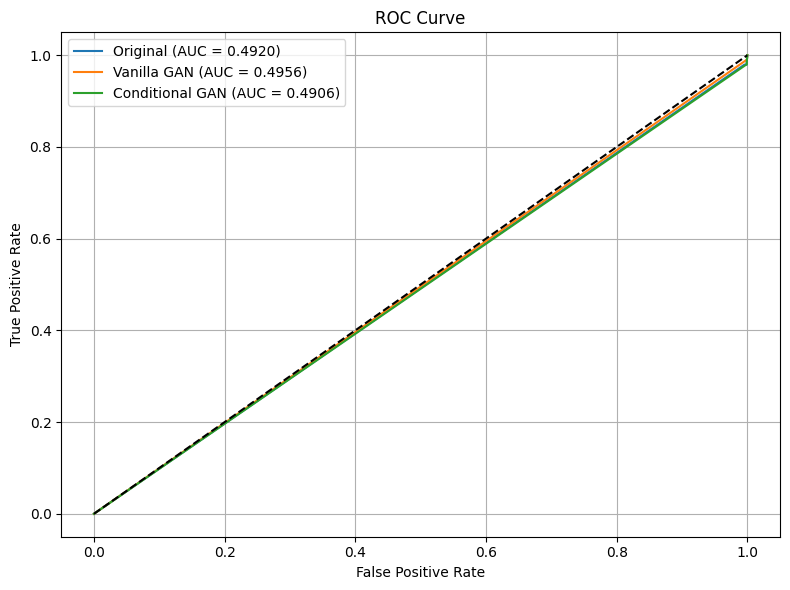

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(res['Labels'], res['Probs'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {res["AUC-ROC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


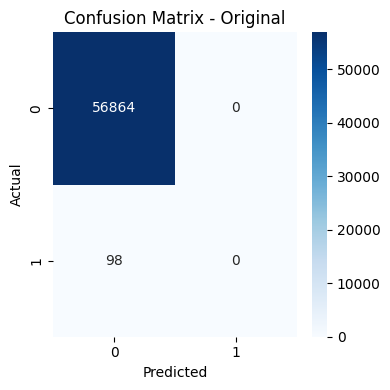

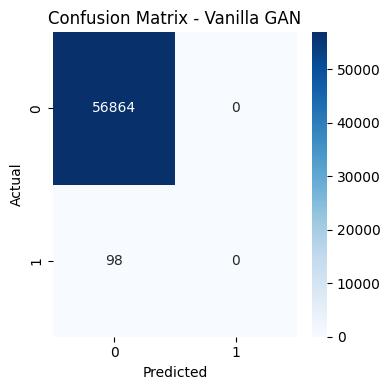

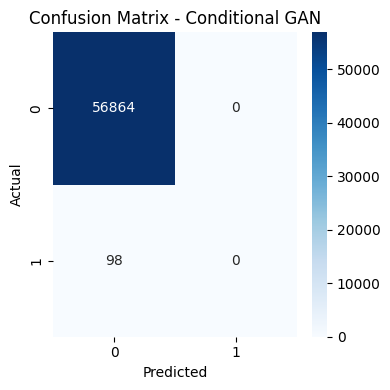

In [ ]:
import seaborn as sns

for name, res in results.items():
    cm = res['Confusion Matrix']
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


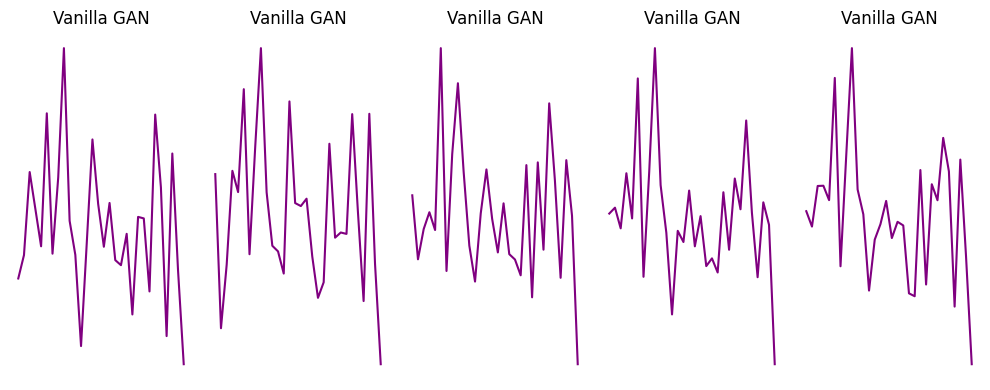

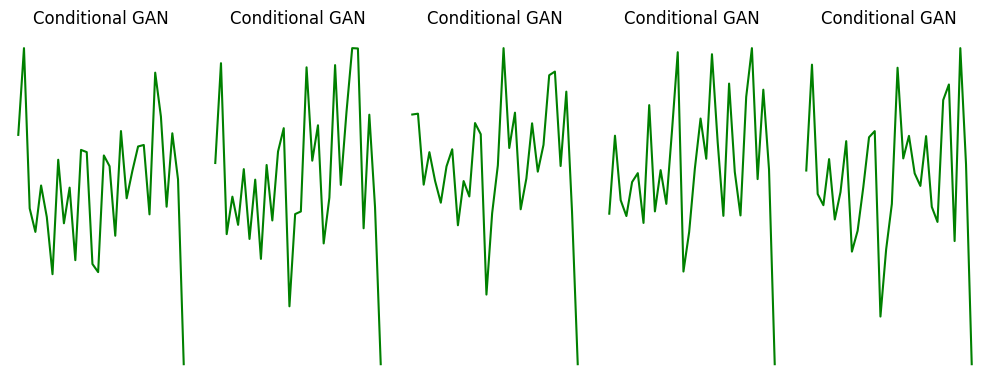

In [ ]:
# نفترض أن العينات هي بيانات رقمية
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.plot(generated_data[i], color='purple')
    plt.title("Vanilla GAN")
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.plot(synthetic_samples[i], color='green')
    plt.title("Conditional GAN")
    plt.axis('off')
plt.tight_layout()
plt.show()
